# Calculating the Harmonic Ensemble Similarity between ensembles

Here we compare the conformational ensembles of proteins in four trajectories, using the harmonic ensemble similarity method.

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Last updated:** December 2022

**Minimum version of MDAnalysis:** 1.0.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests


**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)


<div class="alert alert-info">
    
**Note**

The metrics and methods in the `encore` module are from (<a data-cite="tiberti_encore_2015" href="https://doi.org/10.1371/journal.pcbi.1004415">Tiberti *et al.*, 2015</a>). Please cite them when using the ``MDAnalysis.analysis.encore`` module in published work.

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.tests.datafiles import (PSF, DCD, DCD2, GRO, XTC, 
                                        PSF_NAMD_GBIS, DCD_NAMD_GBIS,
                                        PDB_small, CRD)
from MDAnalysis.analysis import encore

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u1 = mda.Universe(PSF, DCD)
u2 = mda.Universe(PSF, DCD2)
u3 = mda.Universe(GRO, XTC)
u4 = mda.Universe(PSF_NAMD_GBIS, DCD_NAMD_GBIS)

labels = ['DCD', 'DCD2', 'XTC', 'NAMD']

/home/pbarletta/mambaforge/envs/mda-user-guide/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behaviour will be changed in 3.0 to be the same as other readers
  warnings.warn("DCDReader currently makes independent timesteps"


The trajectories can have different lengths, as seen below.

In [3]:
print(len(u1.trajectory), len(u2.trajectory), len(u3.trajectory))

98 102 10


## Calculating harmonic similarity

The harmonic ensemble similarity method treats the conformational ensemble within each trajectory as a high-dimensional Gaussian distribution $N(\mu, \Sigma)$. The mean $\mu$ is estimated as the average over the ensemble. The covariance matrix $\Sigma$ is calculated either using a shrinkage estimator (`cov_estimator='shrinkage'`) or a maximum-likelihood method (`cov_estimator='ml'`).

The harmonic ensemble similarity is then calculated using the symmetrised version of the Kullback-Leibler divergence. This has no upper bound, so you can get some very high values for very different ensembles.

The function we will use is `encore.hes` ([API docs here](https://docs.mdanalysis.org/stable/documentation_pages/analysis/encore/similarity.html#MDAnalysis.analysis.encore.similarity.hes)). It is recommended that you align your trajectories before computing the harmonic similarity. You can either do this yourself with `align.AlignTraj`, or pass `align=True` into `encore.hes`. The latter option will align each of your Universes to the current timestep of the first Universe. Note that since `encore.hes` will pull your trajectories into memory, this changes the positions of your Universes.

In [4]:
hes, details = encore.hes([u1, u2, u3, u4],
                         select='backbone',
                         align=True,
                         cov_estimator='shrinkage',
                         weights='mass')

In [5]:
for row in hes:
    for h in row:
        print("{:>10.1f}".format(h), end = ' ')
    print("")

       0.0    24955.7  1879874.5   145622.3 
   24955.7        0.0  1659867.5   161102.3 
 1879874.5  1659867.5        0.0  9900092.7 
  145622.3   161102.3  9900092.7        0.0 


The mean and covariance matrices for each Universe are saved in `details`. 

In [6]:
details["ensemble1_mean"].shape

(2565,)

### Plotting

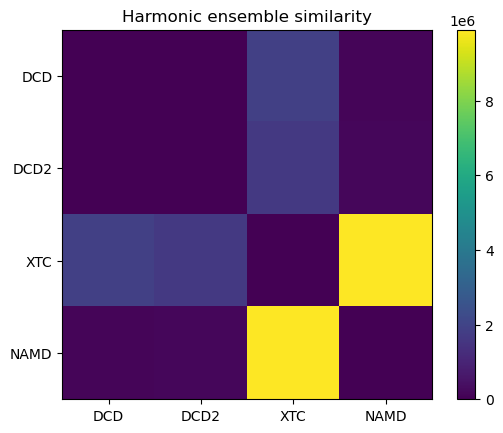

In [7]:
fig, ax = plt.subplots()
im = plt.imshow(hes)
plt.xticks(np.arange(4), labels)
plt.yticks(np.arange(4), labels)
plt.title('Harmonic ensemble similarity')
cbar = fig.colorbar(im)

## References

[1] R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, doi: [10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2] N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, [doi:10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3] ENCORE: Software for Quantitative Ensemble Comparison. Matteo Tiberti, Elena Papaleo, Tone Bengtsen, Wouter Boomsma, Kresten Lindorff-Larsen. *PLoS Comput Biol.* 2015, 11, e1004415.

[4] Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)


## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.

[4] Matteo Tiberti, Elena Papaleo, Tone Bengtsen, Wouter Boomsma, and Kresten Lindorff-Larsen.
<span class="bibtex-protected">ENCORE</span>: <span class="bibtex-protected">Software</span> for <span class="bibtex-protected">Quantitative</span> <span class="bibtex-protected">Ensemble</span> <span class="bibtex-protected">Comparison</span>.
<em>PLOS Computational Biology</em>, 11(10):e1004415, October 2015.
00031.
URL: <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004415">https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004415</a>, <a href="https://doi.org/10.1371/journal.pcbi.1004415">doi:10.1371/journal.pcbi.1004415</a>.